In [1]:
# import geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt

In [130]:
# countries data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

**Print the top 5 rows of world dataframe.**

In [131]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


**Remove continents which have only one country in dataframe.**


In [132]:
# continents with only one country
continent_grouped = world.groupby('continent').agg(n_countries = ("name","count"))
one_country = continent_grouped[continent_grouped['n_countries']==1]
one_country

,n_countries
continent,
Antarctica,1
Seven seas (open ocean),1


In [133]:
# remove these continents
df = world[(world['continent']!='Antarctica') & (world['continent']!='Seven seas (open ocean)')]

In [134]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 175 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     175 non-null    float64 
 1   continent   175 non-null    object  
 2   name        175 non-null    object  
 3   iso_a3      175 non-null    object  
 4   gdp_md_est  175 non-null    int64   
 5   geometry    175 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 9.6+ KB


In [135]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


**Create dataframe with top 3 most populated countries from each continent and store the result in dataframe with name 'world_filtered'.**


In [136]:
world_filtered = df.sort_values(by=["continent","pop_est"], ascending=False).groupby(["continent"]).head(3)


**Print the 'world_filtered' dataframe.**

In [137]:
world_filtered

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
29,2.110495e+08,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
32,5.033944e+07,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
137,2.536431e+07,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."
7,8.776109e+06,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
136,4.917000e+06,Oceania,New Zealand,NZL,206928,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
27,1.275755e+08,North America,Mexico,MEX,1268870,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
18,1.443735e+08,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ..."


In [138]:
arg_geo = world_filtered[world_filtered['name']=='Argentina']['geometry']
for item in arg_geo:
    print(item)


MULTIPOLYGON (((-68.63401022758323 -52.63637045887449, -68.25 -53.1, -67.75 -53.85, -66.45 -54.45, -65.05 -54.699999999999996, -65.5 -55.2, -66.45 -55.25, -66.95992000000001 -54.896810000000016, -67.56244 -54.87001, -68.63335000000001 -54.869499999999995, -68.63401022758323 -52.63637045887449)), ((-57.62513342958296 -30.21629485445426, -57.87493730328188 -31.016556084926208, -58.14244035504076 -32.044503676076154, -58.13264767112145 -33.040566908502015, -58.349611172098875 -33.26318897881541, -58.42707414410439 -33.909454441057576, -58.49544206402655 -34.43148976007008, -57.22582963726366 -35.28802662530788, -57.36235877137878 -35.977390232081476, -56.73748735210545 -36.41312590916655, -56.78828528504836 -36.901571547189334, -57.74915686708346 -38.18387053807989, -59.23185706240189 -38.720220228837235, -61.23744523786564 -38.9284245745412, -62.33595699731013 -38.827707208004334, -62.125763108962936 -39.42410491308485, -62.330530971919494 -40.17258635840034, -62.145994432205214 -40.6768

-----------------
## Part I: Create a choropleth map of world:

   - First using **Geopandas**
       - Note: Geopandas may not work well on your computers, especially on Windows computers, it is advised to use Google Collab for this assignment. 
   - Second using **Plotly**
       - Note: Plotly may not work well on Jupyter Labs, it is advised to use Jupyter Notebooks or Google Collab for the plotly portion. 


> #### Notes
> * the colors of countries from 'world_filtered' are based on population
> * other countries can stay white

### GeoPandas

<AxesSubplot: >

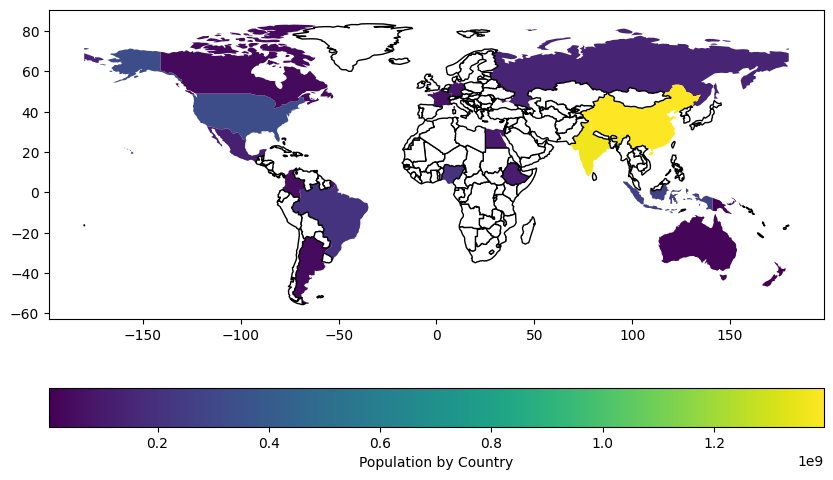

In [139]:
# create figure and axes
fig, ax = plt.subplots(figsize = (10,6))


# create map from world_filtered data-frame
world_filtered.plot(column='pop_est', ax=ax, legend=True, legend_kwds={'label':"Population by Country",'orientation':"horizontal"})


# add the rest of the countries
remaining_world_mask = ~df.isin(world_filtered).all(axis='columns')
remaining_world = df[remaining_world_mask]
remaining_world.plot(color='white', ax=ax, edgecolor='black')

### Plotly

In [140]:
remaining_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."


In [142]:
import pandas as pd

remaining_world['pop_est'] = remaining_world['pop_est'].fillna(0)

combined = pd.concat([world_filtered,remaining_world])
combined.sort_values(by='pop_est')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
20,3.398000e+03,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2..."
22,5.622500e+04,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225..."
134,2.878000e+05,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7..."
89,2.998820e+05,Oceania,Vanuatu,VUT,934,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
160,3.260000e+05,Asia,N. Cyprus,CYN,3600,"POLYGON ((32.73178 35.14003, 32.80247 35.14550..."
...,...,...,...,...,...,...
102,2.165653e+08,Asia,Pakistan,PAK,278221,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


In [143]:
combined.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
29,211049527.0,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
32,50339443.0,South America,Colombia,COL,323615,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
137,25364307.0,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."


In [144]:
import plotly.express as px

df = combined
fig = px.choropleth(df, locations="iso_a3",color='pop_est',hover_name="name", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [105]:
df = px.data.election()
df.head()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")
geo_df.head()
px.data.election_geojson()

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.6363215300962, 45.5759177646435],
       [-73.6362833815582, 45.5758266113331],
       [-73.6446417578686, 45.5658132919643],
       [-73.6453511352974, 45.5647725775888],
       [-73.648867564748, 45.5586898267402],
       [-73.6513170845065, 45.5545659435652],
       [-73.6515658357324, 45.5554439857955],
       [-73.6660837831645, 45.5596724837829],
       [-73.6706609041685, 45.5610978251999],
       [-73.6676019919116, 45.5632340862888],
       [-73.6645385824068, 45.5642716484367],
       [-73.663663123697, 45.5654269638586],
       [-73.663336397858, 45.5666288247853],
       [-73.6637764768649, 45.5678900619231],
       [-73.6625073244826, 45.5688479494114],
       [-73.6624620526633, 45.5708304456346],
       [-73.6620201425015, 45.5713925326191],
       [-73.6616100197742, 45.5737924780218],
       [-73.6612199500215, 45.5747171555678],
       [-7

In [101]:
import plotly.express as px
import geopandas as gpd

df = px.data.world_filtered()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.world_filtered()["pop_est"]
).merge(df, on="name").set_index("name")

# fig = px.choropleth(geo_df,
#                    geojson=geo_df.geometry,
#                    locations=geo_df.index,
#                    color="Joly",
#                    projection="mercator")
# fig.update_geos(fitbounds="locations", visible=False)
# fig.show()

AttributeError: module 'plotly.express.data' has no attribute 'world_filtered'

In [99]:
df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [95]:
help(px.choropleth)

Help on function choropleth in module plotly.express._chart_types:

choropleth(data_frame=None, lat=None, lon=None, locations=None, locationmode=None, geojson=None, featureidkey=None, color=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, projection=None, scope=None, center=None, fitbounds=None, basemap_visible=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a choropleth map, each row of `data_frame` is represented by a
        colored region mark on a map.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be passed for column names (and not keyword

-----------
## Part II: More Geopandas

In Geopandas:

* add New York, Berlin, Paris, Toronto, Calgary, Tokyo to the map you have created before
    * to get geometry of these cities use the function, **gpd.tools.geocode**(['New York', 'Berlin', 'Paris','Toronto', 'Calgary', 'Tokyo'])
    * if you do not have the geopy library instaled, install it with the following command **in the jupyter notebook cell** `!pip install geopy` 

In [ ]:
# get geometry


# create figure and axes




# create map from world_filtered data-frame




# add the rest of the countries



# add cities
